#### 0. Import all modules

In [1]:
#PhD reseach 2020
#Kittipong Wangnok, D6010218
#School of Physics, Institute of Science, Suranaree University of Technology

#Import all module
import sys
import os
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from statistics import stdev
from statistics import mean
from sklearn.datasets import load_iris 
from sklearn import datasets, linear_model, metrics 

#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls *.inp

dpleo_20140112_run022kg5.inp        dpleo_20190227_run039kg5.inp
dpleo_20140228_run011g.inp          dpleo_20190227_run039kg5_block.inp
dpleo_20140331_run026kg5.inp        dpleo_20190406_run021kg5.inp
dpleo_20140331_run028kg5.inp        dpleo_20190406_run021kg5_block.inp
dpleo_20150318_run031kg5.inp        dpleo_20200102_run008g.inp
dpleo_20150319_run032g.inp          dpleo_20200121_run036g.inp
dpleo_20161225_run024kg5.inp        dpleo_20200121_run057r.inp
dpleo_20161225_run024kg5_block.inp  dpleo_20200122_run028g.inp
dpleo_20161225_run025kg5.inp        dpleo_20200122_run030r.inp
dpleo_20170217_run033kg5.inp        dpleo_20200124_run017kg5.inp
dpleo_20170217_run047kg5.inp        dpleo_20200124_run022g.inp
dpleo_20170314_run039r.inp          dpleo_20200131_run009kg5.inp
dpleo_20170316_run036kg5.inp        dpleo_20200229_run030kg5.inp
dpleo_20180121_run076kg5.inp        dpleo_20200317_run031g.inp
dpleo_20180322_run021kg5.inp        dpleo_20200322_run026kg5.inp


#### 1. Input file: change 2 input files

In [3]:
#Please change the input file
InputFile = open("dpleo_20140331_run028kg5.inp",'r').readlines()
N_InputFile = len(InputFile)

#Read data
BJD_time = []
exp_time = []
Flux_12 = []
Flux_err_12 = []
weight_factor = []
subdivision = []

#Please change the input file
for line in open("dpleo_20140331_run028kg5.inp"):
    li=line.strip()
    if not li.startswith("#"):
        BJD_time.append(float(li.split(" ")[0]))
        exp_time.append(float(li.split(" ")[1]))
        Flux_12.append(float(li.split(" ")[2]))
        Flux_err_12.append(float(li.split(" ")[3]))
        weight_factor.append(float(li.split(" ")[4]))
        subdivision.append(float(li.split(" ")[5]))

#################################################################################

#### 2. Convert BJD time to orbital phase

In [4]:
#################################################################################
#DP Leo parameters
t0 = 2456748.3003738
P = 0.06236286

#Set the range of phase to refine the model using star1/2
#ra_12 = -0.04
#rb_12 = 0.04

range_input = []
range_dat = []
#Determine the phase maximum
for i in range(len(BJD_time)):
    Phase = (BJD_time[i] - t0)/P
#    if Phase >= ra_12 and Phase <= rb_12 :
#        print ('%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i,BJD_time[i],Phase, Flux_12[i],Flux_err_12[i]))
    range_input.append('%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i,BJD_time[i],Phase, Flux_12[i],Flux_err_12[i]))
 #       print('%0.6f\t%0.6f\t%0.6f\t%0.6f\t%0.0f\t%0.0f' %(BJD_time[i], exp_time[i], Flux_12[i], Flux_err_12[i], weight_factor[i], subdivision[i]))
    range_dat.append('%0.6f %0.6f %0.6f %0.6f %0.0f %0.0f' %(BJD_time[i], exp_time[i], Flux_12[i], Flux_err_12[i], weight_factor[i], subdivision[i]))


data_out = range_input
f = open("range_dpleo_20140331_run028kg5.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

data_lroche = range_dat
f = open("dpleo_20140331_run028kg5.dat", 'w')
for i in range(len(data_lroche)):
    f.write(str(data_lroche[i])+ '\n')
f.close()

#### 3. Plot graph to obtain the result

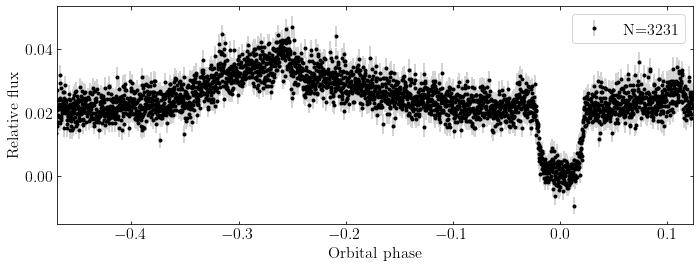

In [5]:
InputFile_1 = "range_dpleo_20140331_run028kg5.out"
Data_1   = np.genfromtxt(InputFile_1)

N_Data_1 = len(Data_1)
#print(N_Data_1)

#Read data
Phase = Data_1[:,2]
Flux_12 = Data_1[:,3]
Flux_err_12 = Data_1[:,4]


##Plotgraph: Relative flux vs. orbital phase of Star1/Star2
fig = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(10, 4), tight_layout=True)
plt.xlim(Phase[1], Phase[-1])
plt.xlabel('Orbital phase')
plt.ylabel('Relative flux')
##
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#
#
#ax0.errorbar(Phase, Flux_12, yerr=Flux_err_12, fmt='o', color='gold', alpha = 1.0, markersize='3.00', label = 'data\_star32')
#

plt.errorbar(Phase, Flux_12, yerr= Flux_err_12, fmt='o', color='black',
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='3.00',  label = 'N='+str(N_Data_1))

#plt.text(0.023, 0, '20140331\_run028')
#fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=700)
plt.legend()
plt.savefig("Unbinned_Data_binning_dpleo_20140331_run028kg5.png")
plt.show()

#### 4. Input data for the binning

In [6]:
x = Data_1[:,2]
y = Data_1[:,3]
dy = Data_1[:,4]

#Number of data point for the binning 
nbins = 1000

#### 5. Data binning determination 
#### Reference:

#### https://stackoverflow.com/questions/15556930/turn-scatter-data-into-binned-data-with-errors-bars-equal-to-standard-deviation
#### https://stackoverflow.com/questions/15477857/mean-values-depending-on-binning-with-respect-to-second-variable/15478137#15478137
#### https://handwiki.org/wiki/Algebraic_formula_for_the_variance
#### All you need to know is, for every bin in x, what are n, sy and sy2, n == the number of y values in that x bin, sy == the sum of those y values, sy2 == the sum of their squares

In [7]:
n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)
nfa = []

#### 6. plot the result between unbinned and binned data

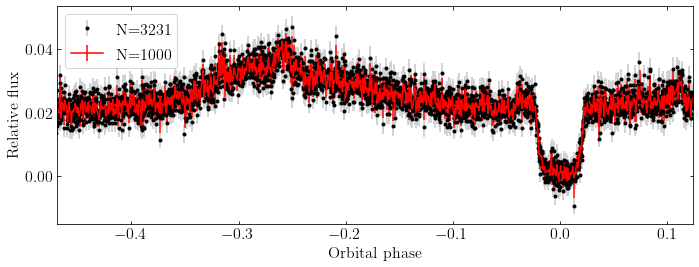

In [8]:
x_bin = (_[1:] + _[:-1])/2
y_bin = mean
dy_bin = std

fig = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(10, 4), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
plt.xlim(x[1], x[-1])
plt.errorbar(x, y, yerr= dy, fmt='o', color='black',
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='3.00', label = 'N='+str(N_Data_1))
plt.errorbar(x_bin, y_bin, yerr= dy_bin, fmt='r-',  label = 'N='+str(nbins))
plt.xlabel('Orbital phase')
plt.ylabel('Relative flux')
plt.legend()
plt.show()

#### 7. plot the result of binned data

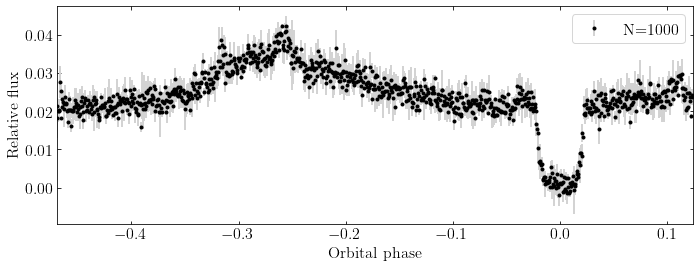

In [9]:
fig = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(10, 4), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
plt.xlim(x[1], x[-1])
#plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='o')
plt.errorbar(x_bin, y_bin, yerr=std, fmt='o', color='black',
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='3.00',  label = 'N='+str(nbins))
plt.xlabel('Orbital phase')
plt.ylabel('Relative flux')
plt.legend()
plt.savefig("Binned_Opt_Data_binning_dpleo_20140331_run028kg5.png")
plt.show()

#### 8. Combine the data

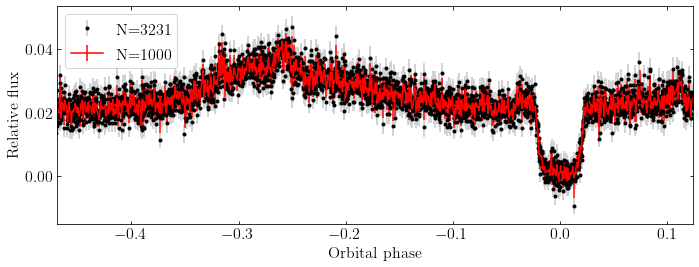

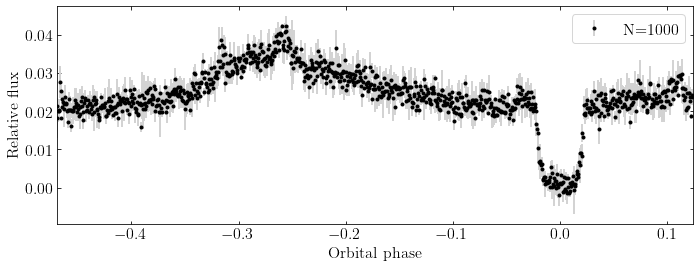

In [10]:
fig = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(10, 4), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
plt.xlim(x[1], x[-1])
plt.errorbar(x, y, yerr= dy, fmt='o', color='black',
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='3.00', label = 'N='+str(N_Data_1))
plt.errorbar(x_bin, y_bin, yerr= dy_bin, fmt='r-',  label = 'N='+str(nbins))
plt.xlabel('Orbital phase')
plt.ylabel('Relative flux')
plt.legend()
plt.show()

fig = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(10, 4), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
plt.xlim(x[1], x[-1])
plt.errorbar(x_bin, y_bin, yerr=std, fmt='o', color='black',
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='3.00',  label = 'N='+str(nbins))
plt.xlabel('Orbital phase')
plt.ylabel('Relative flux')
plt.legend()
plt.show()